In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [ ]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])


In [ ]:
data

(array([[ -9.29768866,   6.47367855],
        [ -9.69874112,   6.93896737],
        [ -1.68665271,   7.79344248],
        [ -7.09730839,  -5.78133274],
        [-10.87645229,   6.3154366 ],
        [ -6.02196757,  -7.04004812],
        [  4.81305976,   2.35848706],
        [ -6.46669574,  -7.44383415],
        [ -2.98837186,   8.82862715],
        [  3.44857534,   2.62972329],
        [ -3.11090424,  10.86656431],
        [  4.99689432,   1.28026009],
        [ -2.30033403,   7.054616  ],
        [ -3.92456837,   8.59364081],
        [ -9.48897033,   6.83639753],
        [ -3.21125072,   8.68662398],
        [-10.46587019,   7.37160786],
        [  2.61473625,   2.159624  ],
        [ -2.41212007,   9.98293112],
        [ -1.92234053,  11.20474175],
        [  5.79847442,   1.15248737],
        [ -2.67048333,   9.41833699],
        [ -5.90450746,  -7.02716697],
        [ -8.95065581,   7.10255332],
        [ -2.97261532,   8.54855637],
        [ -8.30852358,   8.76509154],
        [ -9

In [ ]:
import math
def initialize_centroids(data, k):
    centroids=[];
    x=np.random.choice(data_scaled[:,0],k,replace=False)
    y=np.random.choice(data_scaled[:,1],k,replace=False)
    for i in range(k):
      centroids.append([x[i],y[i]])
    return centroids;


def compute_distances(data, centroids):
    distances=[]
    for i in range(len(centroids)):
      dist_arr=[]
      for j in range(data.shape[0]):
        dist=math.sqrt((((data[j][0]-centroids[i][0])**2)+((data[j][1]-centroids[i][1])**2)));
        dist_arr.append(dist)
      distances.append(dist_arr)
    print(distances)
    print(len(distances))
    return distances





In [ ]:
def assign_clusters(distances):
    clusters=np.argmin(distances,axis=0)


    print(clusters)
    return clusters;


def update_centroids(data, clusters, k, prev_centroids):
    """Update the centroids by computing the mean of the points in each cluster."""
    # Your implementation here
    centroids=[]
    for i in range(k):
      num=0;
      sumX=0;
      sumY=0;
      for j in range(len(clusters)):
        if(clusters[j] == i):
          sumX+=data[j][0];
          sumY+=data[j][1];
          num+=1;
      if(sumX == 0 or sumY == 0):
        centroids.append(prev_centroids[i]);
      else:
        meanX=sumX/num;
        meanY=sumY/num;
      centroids.append([meanX,meanY]);
    print(centroids);
    return centroids;







def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm."""
    # Your implementation here
    centroids=initialize_centroids(data, k);
    for i in range(max_iterations):
      distances=compute_distances(data, centroids)
      clusters=assign_clusters(distances)
      centroids=update_centroids(data, clusters, k,centroids)
    return centroids,clusters





In [ ]:
data[0].shape[0]

300

In [ ]:
# Choose the number of clusters, K
k = 4

# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)


[[0.7328103783822744, 0.8130222776423232, 0.7423281456902838, 1.9882462658482987, 1.0318825298517535, 2.1683986116988243, 2.0466457091786774, 2.2390990121547723, 0.6031798878256631, 1.788299246598084, 0.8394299292298294, 2.140512999836692, 0.6011716759968754, 0.4511246297665967, 0.771907208738221, 0.5562418549945851, 0.9662186915670035, 1.6703126100798886, 0.8093694069096323, 1.0167226866695627, 2.2888203704264054, 0.7110937198360379, 2.1652887649233676, 0.6760363538387619, 0.5776563592645177, 0.6632855811774994, 0.8008257370929974, 1.8536149812541831, 2.3008636043519854, 1.9335018768344054, 0.48986625330098577, 1.8193803339689918, 0.48857420117260636, 2.151892812179956, 1.0017399118601096, 0.8656319674149483, 0.5024114171723159, 2.2330282448630334, 0.6663659205758956, 1.8498601178910759, 2.3012743789074803, 0.7255590001500448, 0.7419994966681823, 1.9631184706965377, 0.5925348800514595, 0.9100664097849629, 0.6359258042310186, 1.9459441946320952, 0.5871970830078285, 2.389080748976512, 2

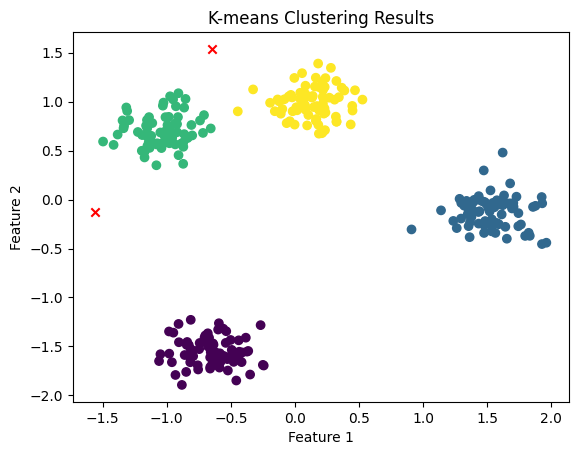

In [ ]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:][0], centroids[:][1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()


In [ ]:
def initialize_medoids(data, k):
    """Randomly initialize the medoids from the data points."""
    # Your implementation here
    medoids=[];
    x=np.random.choice(data_scaled[:,0],k,replace=False)
    y=np.random.choice(data_scaled[:,1],k,replace=False)
    for i in range(k):
      medoids.append([x[i],y[i]])
    return medoids;

def compute_dissimilarities(data, medoids):
    """Compute the dissimilarities between each data point and medoids."""
    # Your implementation here
    dissimilarities=[]
    for i in range(len(medoids)):
      diss_arr=[]
      for j in range(data.shape[0]):
        dist=(abs((data[j][0]-medoids[i][0]))+abs((data[j][1]-medoids[i][1])));
        diss_arr.append(dist)
      dissimilarities.append(diss_arr)
    print(dissimilarities)
    return dissimilarities


In [130]:
import random
def assign_cluster(dissimilarities):
    """Assign each data point to the closest medoid."""
    # Your implementation here
    clusters=np.argmin(dissimilarities,axis=0)
    print(clusters)
    return clusters;

def update_medoids(data, clusters, k,prev_medoids):
    """Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster."""
    # Your implementation here
    cost=0;
    for i in range(k):
      for j in range(len(clusters)):
        if(clusters[j] == i):
          cost+=abs(prev_medoids[i][0]-data[j][0])+abs(prev_medoids[i][1]-data[j][1])

    idx=random.randint(0,k-1)
    x=np.random.choice(data_scaled[:,0],1,replace=False)
    y=np.random.choice(data_scaled[:,1],1,replace=False)
    prev_medoids[idx]=[x,y]
    print(centroids);
    return cost,prev_medoids;

def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm."""
    # Your implementation here
    medoids=initialize_medoids(data, k);
    dissimilarities=compute_dissimilarities(data, medoids)
    clusters=assign_cluster(dissimilarities)
    prev_medoids=medoids;
    cost,medoids=update_medoids(data, clusters, k,medoids)
    prev_cost=cost
    for i in range(max_iterations):
      dissimilarities=compute_dissimilarities(data, medoids)
      clusters=assign_cluster(dissimilarities)
      prev_medoids=medoids;
      cost,medoids=update_medoids(data, clusters, k,medoids)
      if(prev_cost<cost):
        print("Cost Increased So choosing previous medoid: \n")
        medoids=prev_medoids;
      else:
        prev_cost=cost
    return medoids,clusters



In [131]:
k = 4

# Run the K-means algorithm
medoids, clusters = k_means(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[medoids == i] - medoids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)


[[0.4194035844145919, 0.31890462975333855, 1.6487768657767166, 2.420279635985304, 0.4063813024744893, 2.6719563772627213, 3.051633351356686, 2.7097768429398843, 1.394864049563874, 2.7940538212218993, 1.4126793014884216, 3.146649156956162, 1.549759052244388, 1.2178402340927463, 0.3508567441412423, 1.3526762539692287, 0.22520748610455796, 2.6760388685360046, 1.5166684911799446, 1.644252610869131, 3.294996630034822, 1.4588199689599366, 2.6769022102565936, 0.37700735912189653, 1.3982446873080785, 0.3872853802541383, 0.20921896410886895, 2.237785800434381, 2.741094872890571, 2.93812680237191, 1.2989861035624912, 2.8253404144152343, 0.5779037129497875, 3.1570395535801206, 0.012017709366310303, 1.5490233112212388, 0.5742812374603461, 2.6924908056056185, 0.47949925247315617, 2.330200361079654, 3.3073717321153397, 1.5346065838447058, 0.3588772420888561, 2.4037502816101277, 1.4863801249484663, 1.5803953424057458, 0.43087368407648013, 2.9520519276348614, 0.4604852211620119, 3.395242439314542, 2.7

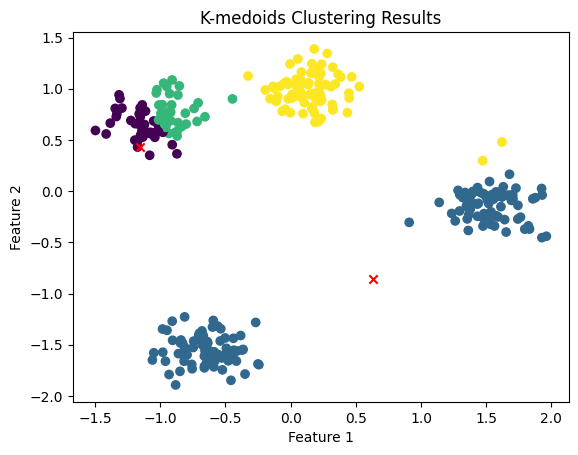

In [133]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(medoids[:][0], medoids[:][1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.show()
